                 neighborhood  percent_families
55              New Homestead             71.50
40             Homewood North             70.66
58          Northview Heights             69.41
11                    Bon Air             69.09
43                  Knoxville             65.23
..                        ...               ...
16  Central Business District             21.09
19            Central Oakland             15.50
57                North Shore             14.29
71                South Shore              0.00
21                    Chateau              0.00

[91 rows x 2 columns]
                 neighborhood      score
55              New Homestead  10.000000
40             Homewood North   9.882517
58          Northview Heights   9.707692
11                    Bon Air   9.662937
43                  Knoxville   9.123077
..                        ...        ...
16  Central Business District   2.949650
19            Central Oakland   2.167832
57                North Shore   

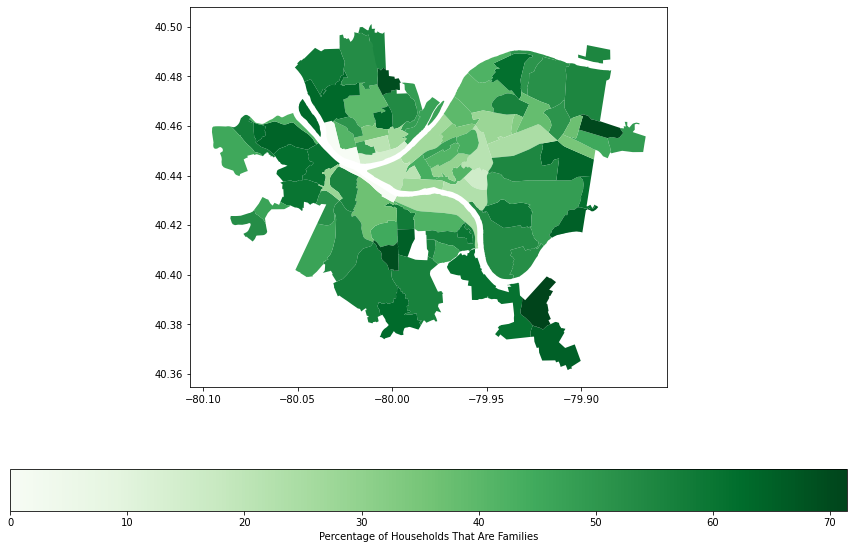

In [14]:
import pandas as pd
import geopandas
%matplotlib inline

# reading in neighborhoods shapefile and household dataset
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
households = pd.read_csv('household-type.csv')

# calculating percentage of family households per each neighborhood and creating a dictionary of the values
family_dict = {}
for index, row in households.iterrows():
    percent_family_households = round((float(row[4]) / float(row[2])), 4) * 100
    family_dict.update({row[0] : percent_family_households})
    

    
# converting the dictionary to a dataframe and sorting it by highest percentage of family households    
families_to_neighborhood = pd.DataFrame({'neighborhood' : family_dict.keys() , 'percent_families' : family_dict.values() })
families_to_neighborhood = families_to_neighborhood.sort_values(by=['percent_families'], ascending=False)

print(families_to_neighborhood)

# merging the neighborhoods map with the families_to_neighborhood dataframe, plotting it, and printing out the 5 best neighborhoods
families_map = neighborhoods.merge(families_to_neighborhood, how='left', left_on='hood', right_on='neighborhood')
Pittsburgh = families_map.plot(column='percent_families', cmap='Greens', legend=True, legend_kwds={"label": "Percentage of Households That Are Families", "orientation": "horizontal"}, figsize=(15,10))


# Creating a dictionary of scores that are normalized out of 10 and then converted into a dataframe    
scores = family_dict
for key, value in scores.items():
    scores[key] = value / 7.15
scores_df = pd.DataFrame({'neighborhood' : scores.keys() , 'score' : scores.values() })
scores_df = scores_df.sort_values(by=['score'], ascending=False)

print(scores_df)
    


It appears as though New Homestead has the highest percentage of households that are families with a whopping 71.50%. Very close behind are Homewood North with 70.66%, Northview Heights with 69.41%, and Bon Air with 69.09%.